In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = 10, 6

# Exploratory Analysis of data 

### Loading the data

In [2]:
path = "/Users/oliverpaul/Data_Science/idiap/lucideles/data"

df = pd.read_csv(path + "/data_for_DL.csv")

In [3]:
df

,blind angle,fully open,ibn,idh,month,day,hour,altitude,azimuth,o1_ill,o2_glare
0,0,1,0,0,1,1,0,-65.8322,340.1180,0.0,0.00286
1,0,1,0,0,1,1,1,-66.3259,14.5549,0.0,0.00286
2,0,1,0,0,1,1,2,-61.1853,43.8949,0.0,0.00286
3,0,1,0,0,1,1,3,-52.7564,64.1540,0.0,0.00286
4,0,1,0,0,1,1,4,-42.9189,78.6676,0.0,0.00286
...,...,...,...,...,...,...,...,...,...,...,...
78835,65,0,0,0,12,31,19,-20.7627,257.7790,0.0,0.00286
78836,65,0,0,0,12,31,20,-31.0544,268.0060,0.0,0.00286
78837,65,0,0,0,12,31,21,-41.4041,279.3470,0.0,0.00286
78838,65,0,0,0,12,31,22,-51.3634,293.2640,0.0,0.00286


In [4]:
#sense check for data types
for col in df.columns:
    print(df[col].dtype, col)

int64 blind angle
int64 fully open
int64 ibn
int64 idh
int64 month
int64 day
int64 hour
float64 altitude
float64 azimuth
float64 o1_ill
float64 o2_glare


### Plotting the data - preprocessed data 

Plotting ibn and idn for year

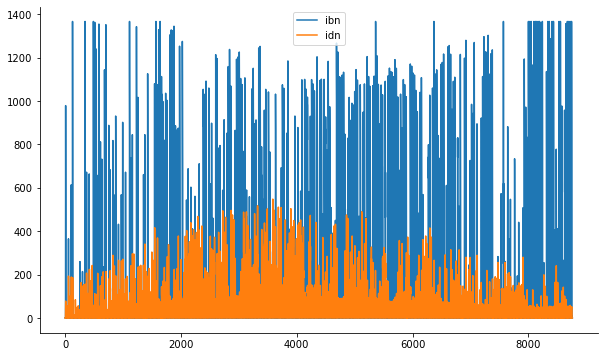

In [5]:
plt.plot(df['ibn'][:8760], label="ibn")
plt.plot(df['idh'][:8760], label="idn")
plt.legend()
plt.show()

It does seem a bit strange that beam radiation trends down during summer. I would have expected it to trend similar to diffuse radiation.

Plotting glare probability across all blind settings

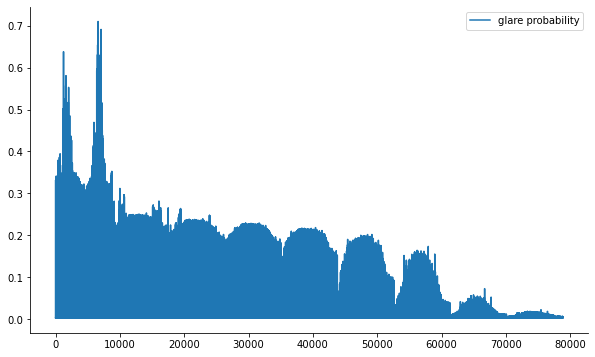

In [6]:
plt.plot(df['o2_glare'], label="glare probability")
plt.legend()
plt.show()

Zooming in on reference case. I guess the suns aspect in spring and summer causes a high probability of glare without blinds

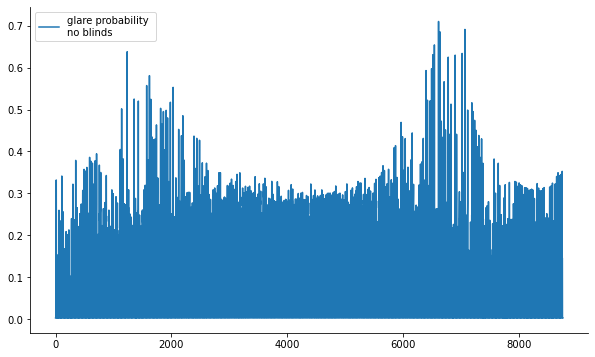

In [7]:
plt.plot(df['o2_glare'][:8760], label="glare probability \nno blinds")
plt.legend()
plt.show()

Plotting illuminance across all blind settings

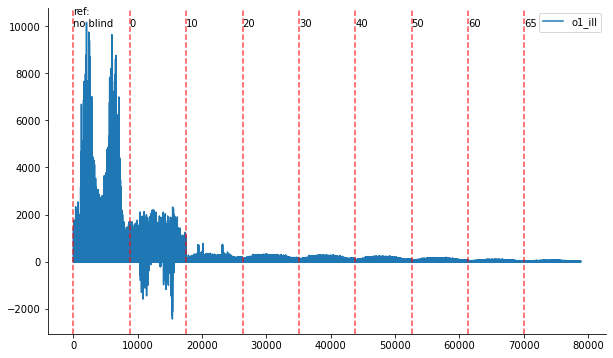

In [8]:
plt.plot(df['o1_ill'], label="o1_ill")
for i in range(0, df.shape[0], 8760):
    plt.axvline(i, ls='--', c='red', alpha=0.7)
    if i == 0:
        plt.annotate("ref:\nno blind", (i, 10000))
        continue
    plt.annotate(str(df['blind angle'][i]), (i,10000))
plt.legend()
plt.show()

### loading version 2 of ill. Seems original data has errors (ill. shouldnt be negative)

In [9]:
dgp_path = "/Users/oliverpaul/Data_Science/idiap/lucideles/data/dgp"
ill_path = "/Users/oliverpaul/Data_Science/idiap/lucideles/data/v2"

In [10]:
ill_ref = pd.read_csv(ill_path + "/w_Ref-joker.ill", sep='\s+', skiprows=13, header=None)
dgp_ref = pd.read_csv(dgp_path + "/dgp-wref.txt", sep=',| |{:*}', engine="python", header=None)

# dropping old columns for ill and glare
df = df.drop(columns=['o1_ill', 'o2_glare'])

In [11]:
#creating lists of reference data (no blinds)
ill = list(np.mean(ill_ref.values, axis=1))
dgp = list(dgp_ref[6].values)

blind_angles = [0, 10, 20, 30, 40, 50, 60, 65]
#looping through all files and extending lists
for angle in blind_angles:
    ill_next = pd.read_csv(ill_path + "/w_evbt%d-joker-v2.ill"%(angle), sep='\s+', skiprows=13, header=None)
    ill_next = np.mean(ill_next.values, axis=1)
    ill.extend(list(ill_next))
    #there is a "version 2" in the file directory, taking this file
    if angle == 0: 
        dgp_next = pd.read_csv(dgp_path + "/dgp-wt0-v2.txt", sep=',| |{:*}', engine="python", header=None)[6].values
        dgp.extend(list(dgp_next))  
    #after we take all the other files
    else:
        dgp_next = pd.read_csv(dgp_path + "/dgp-wt%d.txt"%(angle), sep=',| |{:*}', engine="python", header=None)[6].values
        dgp.extend(list(dgp_next))

#adding these columns to our dataframe
df['dgp'], df['ill'] = dgp, ill

In [12]:
df

,blind angle,fully open,ibn,idh,month,day,hour,altitude,azimuth,dgp,ill
0,0,1,0,0,1,1,0,-65.8322,340.1180,0.00286,0.0
1,0,1,0,0,1,1,1,-66.3259,14.5549,0.00286,0.0
2,0,1,0,0,1,1,2,-61.1853,43.8949,0.00286,0.0
3,0,1,0,0,1,1,3,-52.7564,64.1540,0.00286,0.0
4,0,1,0,0,1,1,4,-42.9189,78.6676,0.00286,0.0
...,...,...,...,...,...,...,...,...,...,...,...
78835,65,0,0,0,12,31,19,-20.7627,257.7790,0.00286,0.0
78836,65,0,0,0,12,31,20,-31.0544,268.0060,0.00286,0.0
78837,65,0,0,0,12,31,21,-41.4041,279.3470,0.00286,0.0
78838,65,0,0,0,12,31,22,-51.3634,293.2640,0.00286,0.0


Plotting new features for sense check 

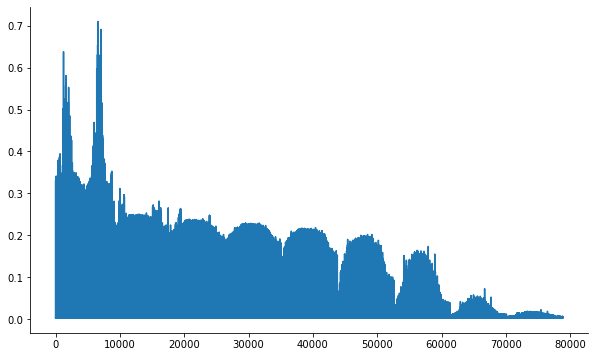

In [13]:
plt.plot(df['dgp'])
plt.show()

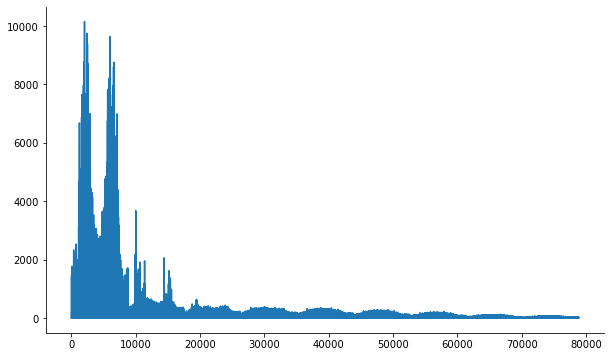

In [14]:
plt.plot(df['ill'])
plt.show()

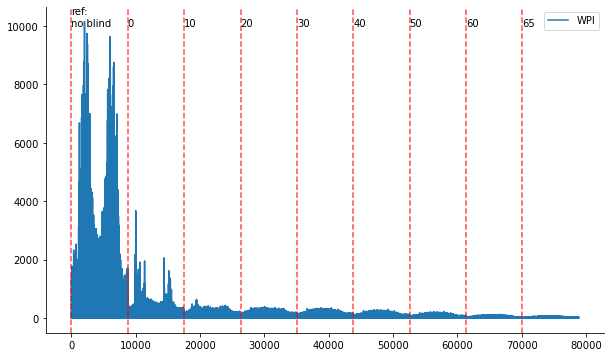

In [16]:
plt.plot(df['ill'], label="WPI")
for i in range(0, df.shape[0], 8760):
    plt.axvline(i, ls='--', c='red', alpha=0.7)
    if i == 0:
        plt.annotate("ref:\nno blind", (i, 10000))
        continue
    plt.annotate(str(df['blind angle'][i]), (i,10000))
plt.legend()
plt.show()

Much better

### Investigating angular features. It might be worth transforming them 

Azimuth 

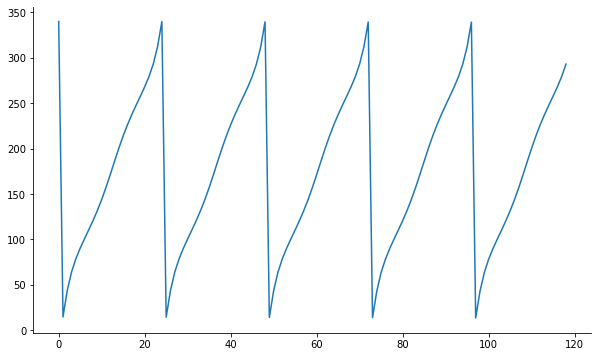

In [16]:
#for 5 days
plt.plot(df['azimuth'][:119])
plt.show()

Altitude

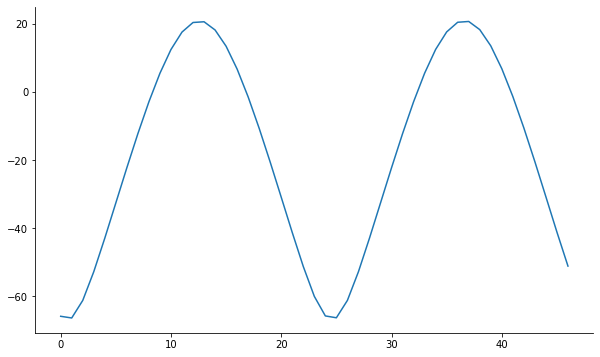

In [17]:
#for 48 hours
plt.plot(df['altitude'][:47])
plt.show()

Sin/cos transformations may help, although it seems the "jumps" between 360 and 0 take place in the night when the model output should be zero so it might not make a difference. Will create these features anyway and see if it helps. Formulas: $x_{sin} = \sin\frac{2*\Pi*x}{max(x)}$ $x_{cos} = \cos\frac{2*\Pi*x}{max(x)}$. Will only transform azimuth. Raw data for altitude seems to well reflect reality (ie. the greatest absolute difference in x is between midnight and midday)

In [18]:
def sin_transform(x):
    """Arguments:
        column or 1d array"""
    return np.sin((2*np.pi*x)/max(x))

def cos_transform(x):
    """Arguments:
        column or 1d array"""
    return np.cos((2*np.pi*x)/max(x))

In [19]:
#creating new dataset with these features added
df_transform = df.copy()

In [20]:
df_transform 

,blind angle,fully open,ibn,idh,month,day,hour,altitude,azimuth,dgp,ill
0,0,1,0,0,1,1,0,-65.8322,340.1180,0.00286,0.0
1,0,1,0,0,1,1,1,-66.3259,14.5549,0.00286,0.0
2,0,1,0,0,1,1,2,-61.1853,43.8949,0.00286,0.0
3,0,1,0,0,1,1,3,-52.7564,64.1540,0.00286,0.0
4,0,1,0,0,1,1,4,-42.9189,78.6676,0.00286,0.0
...,...,...,...,...,...,...,...,...,...,...,...
78835,65,0,0,0,12,31,19,-20.7627,257.7790,0.00286,0.0
78836,65,0,0,0,12,31,20,-31.0544,268.0060,0.00286,0.0
78837,65,0,0,0,12,31,21,-41.4041,279.3470,0.00286,0.0
78838,65,0,0,0,12,31,22,-51.3634,293.2640,0.00286,0.0


In [21]:
#adding transformed features
df_transform['azimuth_sin'], df_transform['azimuth_cos'] = sin_transform(df['azimuth']), cos_transform(df['azimuth'])

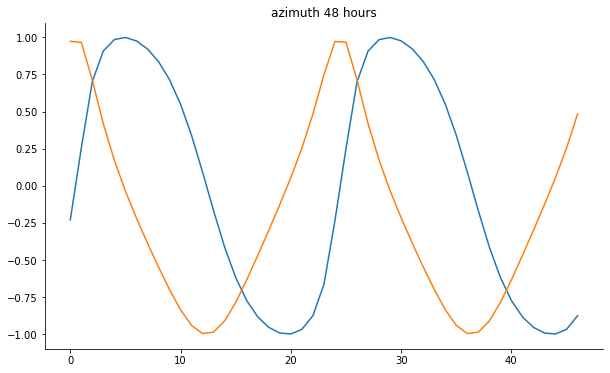

In [22]:
plt.plot(df_transform['azimuth_sin'][:47])
plt.plot(df_transform['azimuth_cos'][:47])
plt.title("azimuth 48 hours")
plt.show()

Now, sin and cosine values for azimuth are close to each other before and after midnight as they should be.

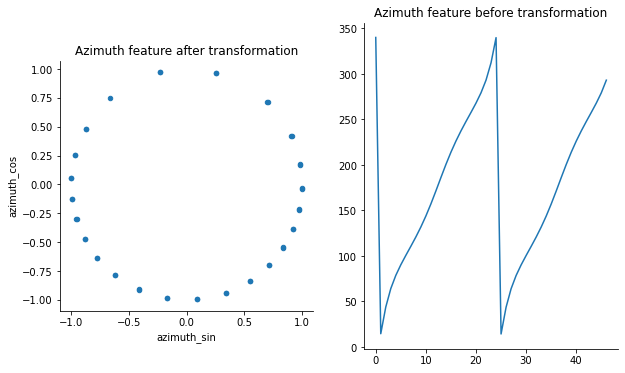

In [26]:
#for 48 hours
fig, ax = plt.subplots(1, 2)
df_transform[:47].plot.scatter('azimuth_sin','azimuth_cos', ax=ax[0]).set_aspect('equal')
ax[1].plot(df['azimuth'][:47])
ax[0].set_title("Azimuth feature after transformation")
ax[1].set_title("Azimuth feature before transformation")
plt.show()

In [356]:
#saving df's to csv
df.to_csv(path + "/data_no_transform")
df_transform.to_csv(path + "/data_transform")

### Plotting all features against target

In [6]:
df_plot = pd.read_csv(path + "/data_no_transform", index_col=0)

In [25]:
def plot_cols(column_list, target_col, df):
    len_col = len(column_list)
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, axes = plt.subplots(len_col, figsize = (6, 6 *len_col))
    for col, ax in zip(column_list, axes): 
        ax.scatter(df[col], df[target_col], alpha = 0.3, c = np.random.choice(color))
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

In [30]:
cols_list = list(df_plot.columns)
cols_list.remove('dgp')
cols_list.remove('ill')

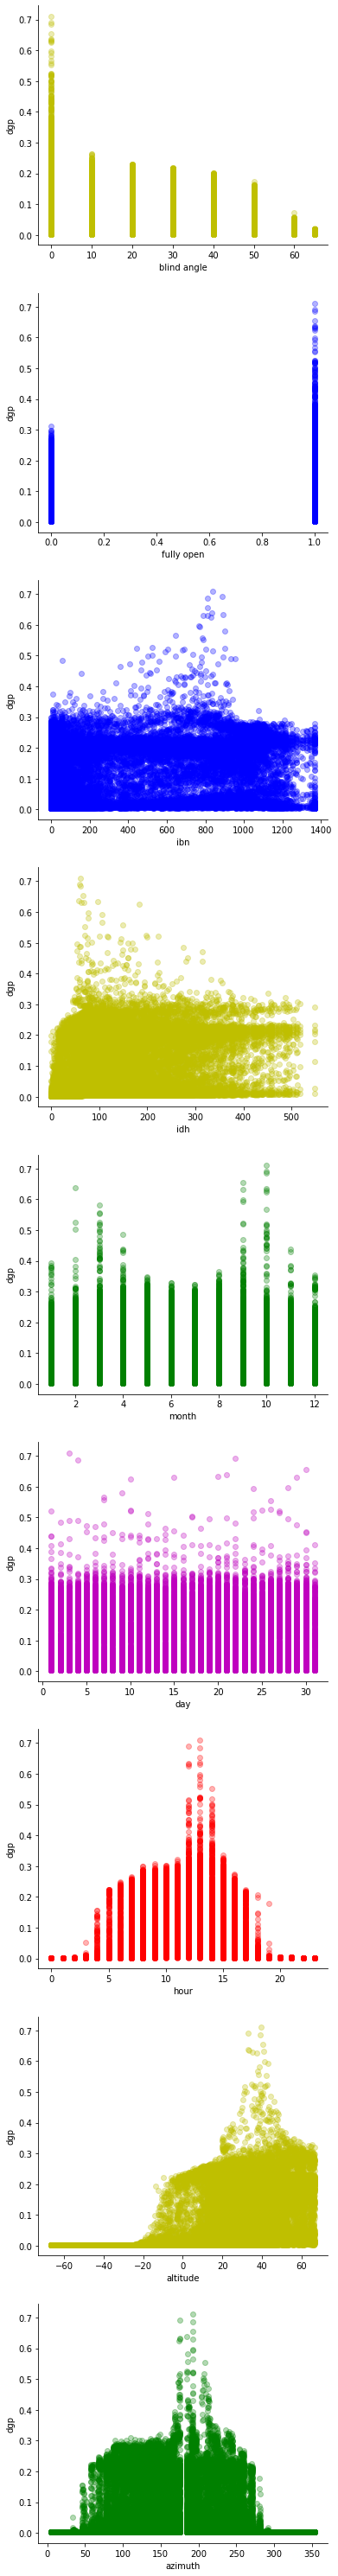

In [31]:
target_col = 'dgp'
plot_cols(cols_list, target_col, df_plot)

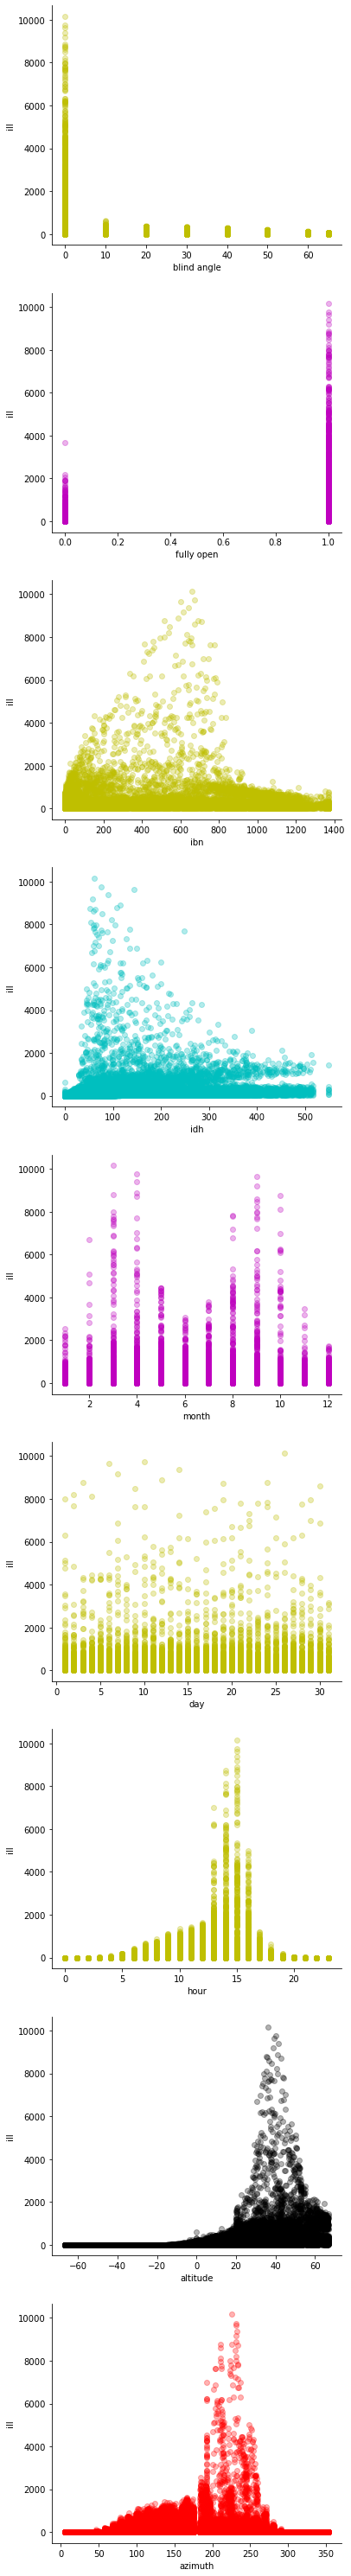

In [32]:
target_col = 'ill'
plot_cols(cols_list, target_col, df_plot)